In [1]:
import sys, os
sys.path.insert(1,'/global/homes/b/bpb/repos/metatlas/' )
from metatlas import metatlas_objects as metob
f = metob.retrieve('Lcmsruns',username='*')


('NERSC=', True)


/global/common/software/m2650/python-cori/lib/python2.7/site-packages/pymysql/cursors.py:166: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  result = self._query(query)


In [2]:
import pandas as pd
df = metob.to_dataframe(f)

In [3]:
print(len(df['name'].unique()),len(df['experiment'].unique()))

(117630, 916)


In [4]:
# from metatlas.helpers import metatlas_get_data_helper_fun as ma_data
# df_file = ma_data.df_container_from_metatlas_file(f[-1])
# print(f[-1].name)
# for k in df_file.keys():
#     s = df_file[k].shape[0]
#     if s>0:
#         print(k,'number of points',df_file[k].shape[0])
#         print('number of spectra',len(df_file[k].rt.unique()))
#         print('')

In [5]:
df.drop_duplicates(subset='name',inplace=True)
df.to_csv('/global/homes/b/bpb/Downloads/metatlas_files.csv')

In [6]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2020, 6, 17, 9, 8, 34, 784006)

In [7]:
import time
t0 = time.time() - 1.5*365*24*60*60
dt.datetime.fromtimestamp(t0)

datetime.datetime(2018, 12, 17, 20, 8, 34, 805795)

In [8]:
df.head()

,acquisition_time,creation_time,description,experiment,hdf5_file,injection_volume,injection_volume_units,last_modified,method,mzml_file,name,pass_qc,sample,unique_id,username
0,NaN,2015-09-20 02:22:51,20140719_BSC_ExoMetabolomics 140718 M9C Rep1 I...,20140719_BSC_ExoMetabolomics,/project/projectdirs/metatlas/raw_data/bpb/201...,NaN,uL,2015-12-13 15:48:56,None,/project/projectdirs/metatlas/raw_data/bpb/201...,140718 M9C Rep1 Isolate_6.mzML,None,None,0023cb10fccb4904b7464ce00e9f5208,bpb
1,NaN,2015-09-20 02:23:18,20140719_BSC_ExoMetabolomics 140703 R2A Rep3 I...,20140719_BSC_ExoMetabolomics,/project/projectdirs/metatlas/raw_data/bpb/201...,NaN,uL,2015-12-13 15:49:18,None,/project/projectdirs/metatlas/raw_data/bpb/201...,140703 R2A Rep3 Isolate_15.mzML,None,None,00e15ee0670148919a8bf3eb3df5e1d8,bpb
2,NaN,2015-09-20 02:22:21,20140719_BSC_ExoMetabolomics 140703 R2A Rep1 I...,20140719_BSC_ExoMetabolomics,/project/projectdirs/metatlas/raw_data/bpb/201...,NaN,uL,2015-12-13 15:50:19,None,/project/projectdirs/metatlas/raw_data/bpb/201...,140703 R2A Rep1 Isolate_14.mzML,None,None,007fc50b6cf941a8a338677711daedc8,bpb
3,NaN,2015-09-20 02:22:23,20140719_BSC_ExoMetabolomics 140718 M9C Rep1 I...,20140719_BSC_ExoMetabolomics,/project/projectdirs/metatlas/raw_data/bpb/201...,NaN,uL,2015-12-13 15:50:19,None,/project/projectdirs/metatlas/raw_data/bpb/201...,140718 M9C Rep1 Isolate_15.mzML,None,None,00e28ee5ebb84ba9909d7b36ca5e1b4d,bpb
4,NaN,2015-09-20 02:21:04,20140719_BSC_ExoMetabolomics 140707 Neg R2A Re...,20140719_BSC_ExoMetabolomics,/project/projectdirs/metatlas/raw_data/bpb/201...,NaN,uL,2015-12-13 15:50:19,None,/project/projectdirs/metatlas/raw_data/bpb/201...,140707 Neg R2A Rep1 Isolate_3.mzML,None,None,0102c7cc853a40efad9f9ee9fc1e8d49,bpb


In [9]:
os.path.getsize(ff.mzml_file)

NameError: name 'ff' is not defined

In [9]:
time = []
files = []
size = []
for i,ff in df.iterrows():
    if os.path.isfile(ff.mzml_file):
        if ff.acquisition_time:

            if ff.acquisition_time>0:
                time.append(ff.acquisition_time)
                size.append(os.path.getsize(ff.mzml_file))
                files.append(1)
            else:
                size.append(os.path.getsize(ff.mzml_file))
                time.append(t0)
                files.append(1)
        else:
            time.append(t0)
            size.append(os.path.getsize(ff.mzml_file))
            files.append(1)
time = sorted(time)

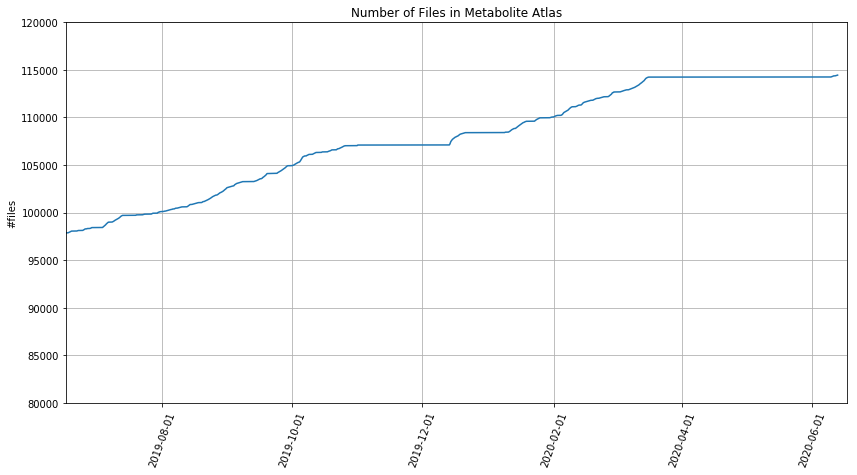

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
# plt.xkcd()
# from matplotlib.font_manager import FontProperties
# prop = FontProperties(fname='/global/homes/b/bpb/Downloads/Humor-Sans.ttf', size=16)

fig = plt.figure(figsize = (14,7),facecolor='white')
ax = fig.add_subplot(1, 1, 1)

import datetime as dt
x = [dt.datetime.fromtimestamp(d) for d in time]

plt.plot(x,np.cumsum(files))

import matplotlib.dates as md

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
# plt.yticks(fontproperties=prop)
plt.ylabel('#files')#,fontproperties=prop)
plt.xticks(rotation=70)#,fontproperties=prop)
plt.title("Number of Files in Metabolite Atlas")#,fontproperties=prop)
datenow = dt.datetime.now()
dstart = dt.datetime(datenow.year-1,datenow.month,datenow.day)
plt.xlim(dstart, datenow) 
plt.ylim(80000,120000)
ax.grid()
plt.show()

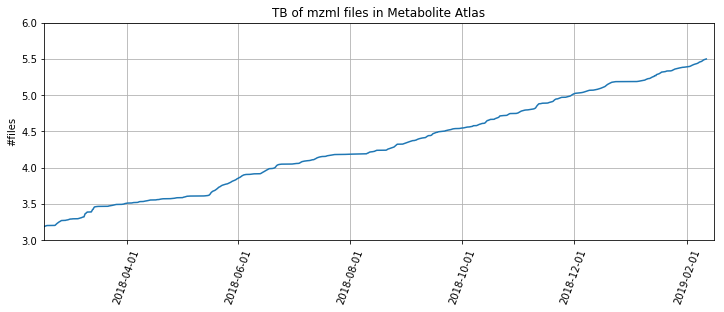

In [29]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
# plt.xkcd()
# from matplotlib.font_manager import FontProperties
# prop = FontProperties(fname='/global/homes/b/bpb/Downloads/Humor-Sans.ttf', size=16)

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1, 1, 1)

import datetime as dt
x = [dt.datetime.fromtimestamp(d) for d in time]

plt.plot(x,np.cumsum(size)/1e12)

import matplotlib.dates as md

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
# plt.yticks(fontproperties=prop)
plt.ylabel('#files')#,fontproperties=prop)
plt.xticks(rotation=70)#,fontproperties=prop)
plt.title("TB of mzML files in Metabolite Atlas")#,fontproperties=prop)
datenow = dt.datetime.now()
dstart = dt.datetime(datenow.year-1,datenow.month,datenow.day)
plt.xlim(dstart, datenow) 
plt.ylim(3,6)
ax.grid()
plt.show()

Text(0,0.5,'#Files')

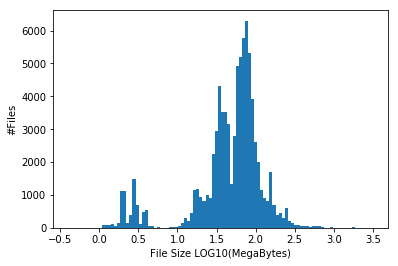

In [39]:
fig,ax = plt.subplots()
ax.hist(np.log10(np.asarray(size)/1e6),bins=100)
ax.set_xlabel('File Size LOG10(MegaBytes)')
ax.set_ylabel('#Files')